In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
data = pd.read_csv('PHY293_Lab_2_Arthur_Jonathan.csv')

In [ ]:
selected_data = data[0:13]
selected_data

,Voltage (kV),Inner (mm),Outer (mm),Delta Radii (mm),Wavelength (pm),Delta Wavelength (pm)
0,2.6,21.50,36.25,0.176777,24.053770,0.2310
1,2.8,19.50,33.50,0.176777,23.178793,0.2070
2,3.0,18.38,31.75,0.176777,22.392841,0.1870
3,3.2,17.25,30.50,0.176777,21.681775,0.1690
4,3.4,16.50,29.00,0.176777,21.034412,0.1550
5,3.6,15.75,27.25,0.176777,20.441774,0.1420
6,3.8,15.00,26.50,0.176777,19.896561,0.1310
7,4.0,14.50,25.00,0.176777,19.392769,0.1210
8,4.2,14.00,24.00,0.176777,18.925405,0.1130
9,4.4,13.25,23.75,0.176777,18.490280,0.1050


In [ ]:
inner_radius = selected_data['Inner (mm) ']
outer_radius = selected_data['Outer (mm)']
delta_radii = selected_data['Delta Radii (mm)']

wavelength = selected_data['Wavelength (pm)']
delta_wavelength = selected_data['Delta Wavelength (pm)']


Inner Radius Linear Fit y = 1.3136x + -10.8733   R^2 = 0.987


Text(0, 0.5, 'Radius of the Ring (mm)')

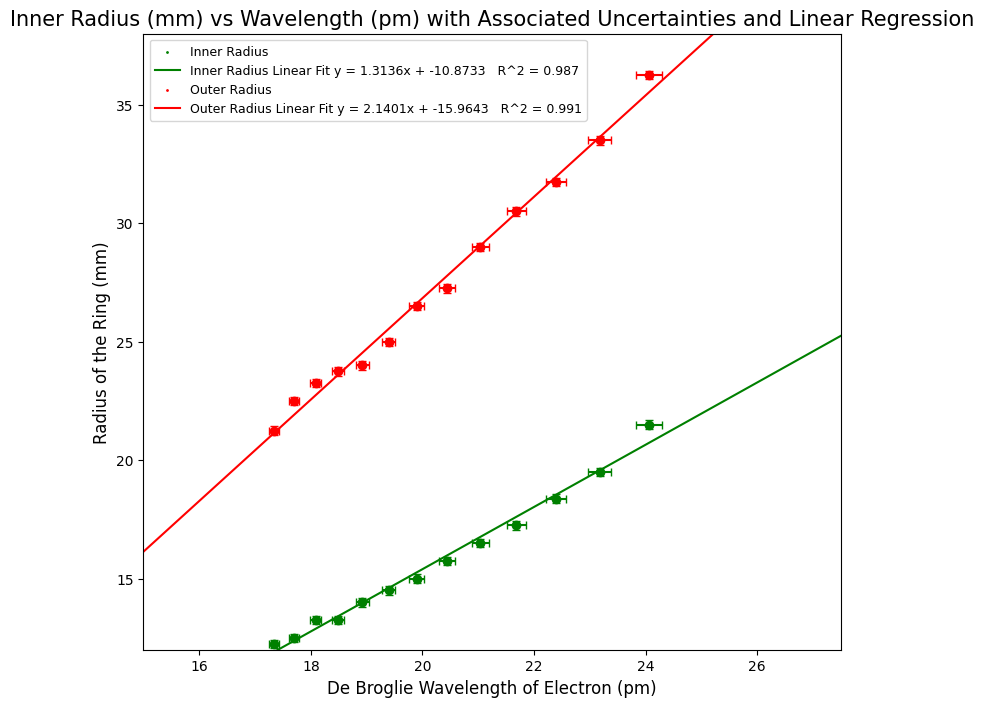

In [ ]:
plt.rcParams["figure.figsize"] = [9, 8]
plt.scatter(wavelength, inner_radius, c = 'g', marker = 'o', s = 1)
plt.errorbar(wavelength, inner_radius, c = 'g', yerr =delta_radii, xerr = delta_wavelength, fmt='o', capsize = 3)
m1, b1 = np.polyfit(wavelength, inner_radius, 1)
plt.plot(np.linspace(0,30,30), m1*np.linspace(0,30,30) + b1, color = 'g')


plt.scatter( wavelength, outer_radius, c = 'r', marker = 'o', s= 1)
plt.errorbar( wavelength, outer_radius, c = 'r', yerr =delta_radii, xerr = delta_wavelength, fmt='o', capsize =3 )
m2, b2 = np.polyfit(wavelength, outer_radius, 1)
plt.plot(np.linspace(0,30,30), m2*np.linspace(0,30,30) + b2, color = 'r')


str1 = 'Inner Radius Linear Fit y = ' + str(round(float(m1), 4)) + "x + " +str(round(float(b1), 4)) + '   R^2 = 0.987'
str2 = 'Outer Radius Linear Fit y = ' + str(round(float(m2), 4)) + "x + " +str(round(float(b2), 4)) + '   R^2 = 0.991'


print(str1)
plt.title('Inner Radius (mm) vs Wavelength (pm) with Associated Uncertainties and Linear Regression', fontsize = 15)
plt.legend(["Inner Radius", str1 , "Outer Radius", str2], fontsize = 9)

plt.xlim(15, 27.5)
plt.xlabel('De Broglie Wavelength of Electron (pm)', fontsize = 12)

plt.ylim(12, 38)
plt.ylabel('Radius of the Ring (mm)', fontsize = 12)


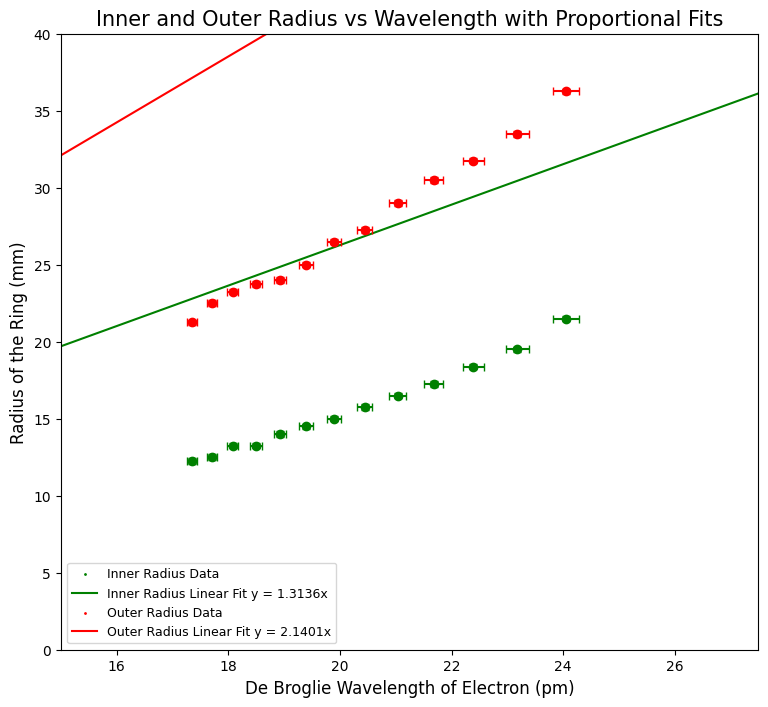

In [ ]:

# Your data

# Set the figure size
plt.rcParams["figure.figsize"] = [9, 8]

# Plot inner radius data with a proportional fit
m1, _ = np.polyfit(wavelength, inner_radius, 1)
plt.scatter(wavelength, inner_radius, c='g', marker='o', s=1, label='Inner Radius Data')
plt.errorbar(wavelength, inner_radius, c='g', yerr=delta_radii, xerr=delta_wavelength, fmt='o', capsize=3)
plt.plot(np.linspace(0, 30, 30), m1 * np.linspace(0, 30, 30), color='g', label=f'Inner Radius Linear Fit y = {m1:.4f}x')

# Plot outer radius data with a proportional fit
m2, _ = np.polyfit(wavelength, outer_radius, 1)
plt.scatter(wavelength, outer_radius, c='r', marker='o', s=1, label='Outer Radius Data')
plt.errorbar(wavelength, outer_radius, c='r', yerr=delta_radii, xerr=delta_wavelength, fmt='o', capsize=3)
plt.plot(np.linspace(0, 30, 30), m2 * np.linspace(0, 30, 30), color='r', label=f'Outer Radius Linear Fit y = {m2:.4f}x')

# Set the title and legend
plt.title('Inner and Outer Radius vs Wavelength with Proportional Fits', fontsize=15)
plt.legend(fontsize=9)

# Set axis limits and labels
plt.xlim(15, 27.5)
plt.xlabel('De Broglie Wavelength of Electron (pm)', fontsize=12)
plt.ylim(0, 40)
plt.ylabel('Radius of the Ring (mm)', fontsize=12)

# Show the plot
plt.show()


PROPORTIONAL RELATIONSHIP STARTS HERE (IGNORE ABOVE)

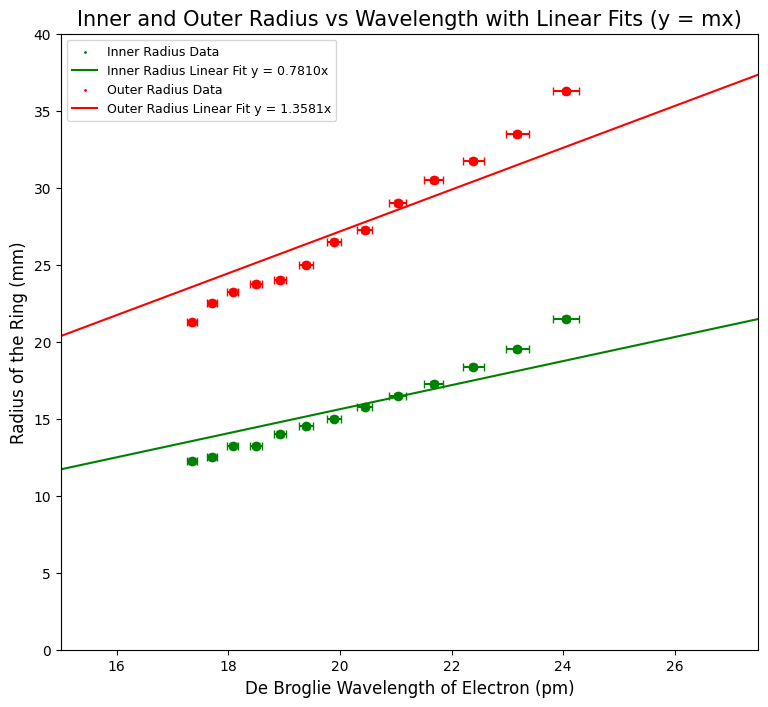

In [ ]:

from scipy.optimize import curve_fit

# Define the linear function y = mx
def linear_function(x, m):
    return m * x


# Set the figure size
plt.rcParams["figure.figsize"] = [9, 8]

# Fit the inner radius data to the linear function
params_inner, _ = curve_fit(linear_function, wavelength, inner_radius)
m1 = params_inner[0]

# Plot inner radius data and the linear fit
plt.scatter(wavelength, inner_radius, c='g', marker='o', s=1, label='Inner Radius Data')
plt.errorbar(wavelength, inner_radius, c='g', yerr=delta_radii, xerr=delta_wavelength, fmt='o', capsize=3)
plt.plot(np.linspace(0, 30, 30), linear_function(np.linspace(0, 30, 30), m1), color='g', label=f'Inner Radius Linear Fit y = {m1:.4f}x')

# Fit the outer radius data to the linear function
params_outer, _ = curve_fit(linear_function, wavelength, outer_radius)
m2 = params_outer[0]

# Plot outer radius data and the linear fit
plt.scatter(wavelength, outer_radius, c='r', marker='o', s=1, label='Outer Radius Data')
plt.errorbar(wavelength, outer_radius, c='r', yerr=delta_radii, xerr=delta_wavelength, fmt='o', capsize=3)
plt.plot(np.linspace(0, 30, 30), linear_function(np.linspace(0, 30, 30), m2), color='r', label=f'Outer Radius Linear Fit y = {m2:.4f}x')

# Set the title and legend
plt.title('Inner and Outer Radius vs Wavelength with Linear Fits (y = mx)', fontsize=15)
plt.legend(fontsize=9)

# Set axis limits and labels
plt.xlim(15, 27.5)
plt.xlabel('De Broglie Wavelength of Electron (pm)', fontsize=12)
plt.ylim(0, 40)
plt.ylabel('Radius of the Ring (mm)', fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Residuals Plot:
from scipy.stats import linregress

#Residuals Inner Radius:
residuals_inner_radius = []
for i in range(len(inner_radius)):
  residuals_inner_radius.append( abs(round(abs(inner_radius[i]) - (m1 * wavelength[i]),2)) )
print(sum(residuals_inner_radius))

#Residuals Outer Radius:
residuals_outer_radius = []
for i in range(len(outer_radius)):
  residuals_outer_radius.append( abs(round(abs(outer_radius[i]) - (m2 * wavelength[i]),2) ))
print(sum(residuals_outer_radius))

inner_centered = inner_radius - np.mean(inner_radius)
outer_centered = outer_radius - np.mean(outer_radius)

wavelength_centered = wavelength - np.mean(wavelength)

slope, _, r_value, p_value, std_err = linregress(wavelength_centered, inner_centered)
print(slope, std_err)

12.26
19.009999999999998
1.3136186398768235 0.045234416141683


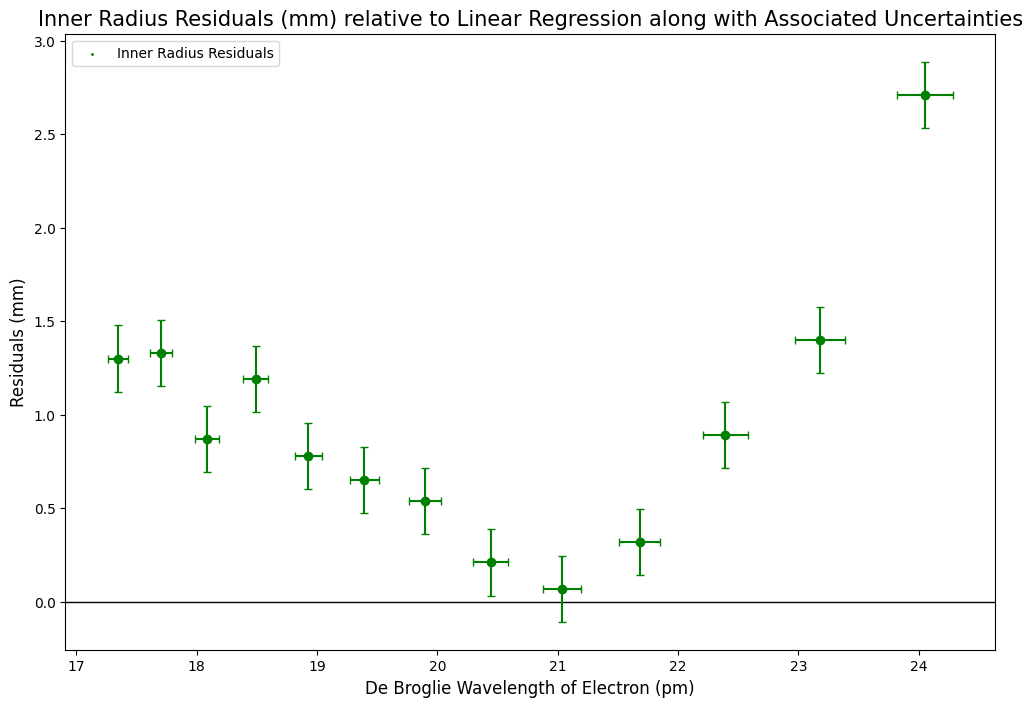

In [ ]:
plt.rcParams["figure.figsize"] = [12, 8]


#Inner Radius
plt.scatter(wavelength, residuals_inner_radius, c = 'g', marker = 'o', s = 1)
plt.axhline(y = 0, color = 'black', linewidth = 1)

plt.errorbar(wavelength, residuals_inner_radius, c = 'g', yerr =delta_radii, xerr = delta_wavelength, fmt='o', capsize = 3)
plt.title('Inner Radius Residuals (mm) relative to Linear Regression along with Associated Uncertainties', fontsize = 15)
plt.xlabel('De Broglie Wavelength of Electron (pm)', fontsize = 12)
plt.ylabel('Residuals (mm)', fontsize = 12)

plt.legend(["Inner Radius Residuals"])


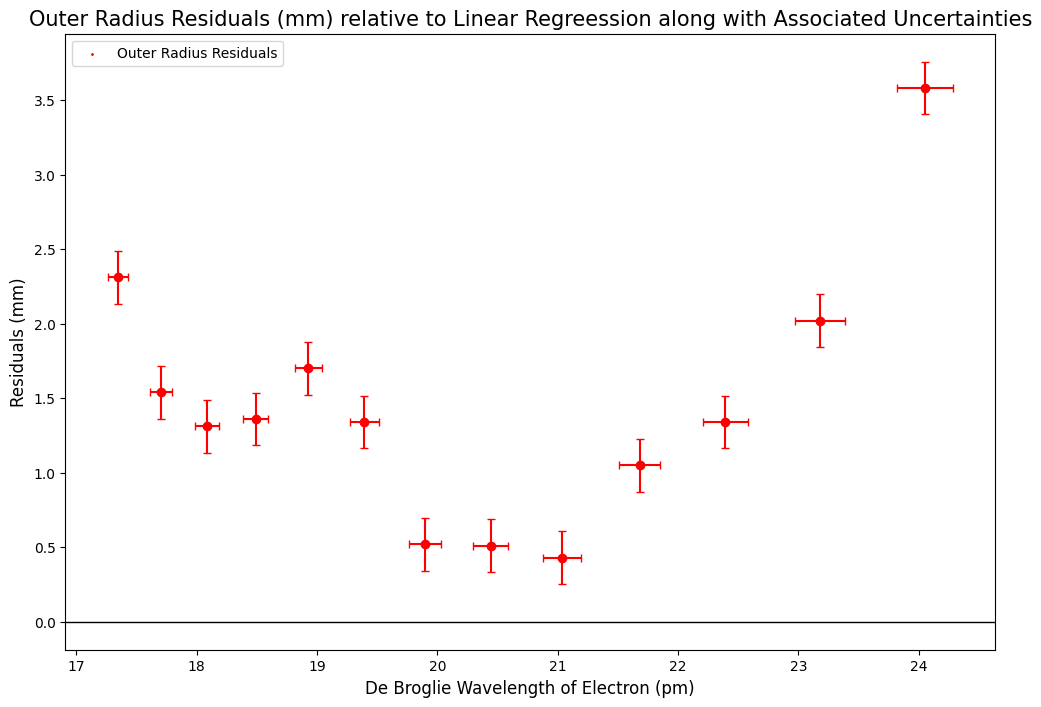

In [ ]:
plt.rcParams["figure.figsize"] = [12, 8]


#Outer Radius
plt.scatter(wavelength, residuals_outer_radius, c = 'r', marker = 'o', s = 1)
plt.axhline(y = 0, color = 'black', linewidth = 1)

plt.errorbar(wavelength, residuals_outer_radius, c = 'r', yerr =delta_radii, xerr = delta_wavelength, fmt='o', capsize = 3)
plt.title('Outer Radius Residuals (mm) relative to Linear Regreession along with Associated Uncertainties', fontsize = 15)

plt.xlabel('De Broglie Wavelength of Electron (pm)', fontsize = 12)
plt.ylabel('Residuals (mm)', fontsize = 12)

plt.legend(["Outer Radius Residuals"])
